# Linear regression 

It is a statistical model that examines the linear relationship between two (Simple Linear Regression ) or more (Multiple Linear Regression) variables — a dependent variable and independent variable(s). Linear relationship basically means that when one (or more) independent variables increases (or decreases), the dependent variable increases (or decreases) too:

A linear relationship can be positive (independent variable goes up, dependent variable goes up) or negative (independent variable goes up, dependent variable goes down)

### A Little Bit About the Math
A relationship between variables Y and X is represented by this equation: 
    ### Yi=mx+b

In this equation, Y is the dependent variable — or the variable we are trying to predict or estimate; X is the independent variable — the variable we are using to make predictions; m is the slope of the regression line — it represent the effect X has on Y. In other words, if X increases by 1 unit, Y will increase by exactly m units. (“Full disclosure”: this is true only if we know that X and Y have a linear relationship. In almost all linear regression cases, this will not be true!) b is a constant, also known as the Y-intercept. If X equals 0, Y would be equal to b. This is not necessarily applicable in real life — we won’t always know the exact relationship between X and Y or have an exact linear relationship.
These caveats lead us to a Simple Linear Regression (SLR). In a SLR model, we build a model based on data — the slope and Y-intercept derive from the data


#### Here we will look at a problem statement of how the salary is impacted due to change in Age

In [12]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# importing the dataset

dataset=pd.read_csv(r"Salary_Data.csv")
X=dataset.iloc[: , : -1].values
y=dataset.iloc[ : , 1 ].values

In [3]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
dataset.shape

(30, 2)

In [5]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


#### TRAIN TEST SPLIT 

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split (X,y, test_size=0.3 , random_state=0)

#### FEATURE SCALING 
#### Standardization: (standardscaler) - Helps to scale down the features based on standard normal distribution ( here mu=0 and sd= 1)
Standarization is also used to bring all the variables to a similar scale. Standarization means centering the variable at zero, and standardizing the variance at 1. The procedure involves subtracting the mean of each observation and then dividing by the standard deviation:
z = (x - x_mean) / std
Where to use : Most of cases


In [7]:
'''from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)

sc_y=StandardScaler()
y_train=sc_y.fit_transform(y_train.reshape(1, -1))'''


'from sklearn.preprocessing import StandardScaler\nsc_X=StandardScaler()\nX_train=sc_X.fit_transform(X_train)\nX_test=sc_X.fit_transform(X_test)\n\nsc_y=StandardScaler()\ny_train=sc_y.fit_transform(y_train.reshape(1, -1))'

####  Fitting Simple Linear Regression to the Training set

In [8]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

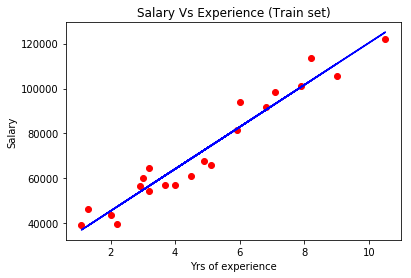

In [14]:
# Visualising the Training set results
plt.scatter(X_train,y_train, color= 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

plt.title('Salary Vs Experience (Train set)')
plt.xlabel('Yrs of experience')
plt.ylabel('Salary')
plt.show()

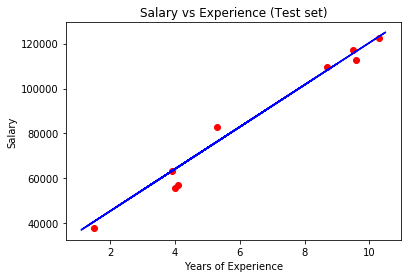

In [15]:
# Visualising the Test set results
plt.scatter(X_test,y_test, color= 'red')
plt.plot( X_train,regressor.predict(X_train), color='blue')

plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [17]:
# This is the R² score of our model. This the percentage of explained variance of the predictions.
regressor.score(X,y)

0.9565144135078991

In [18]:
# the coefficients for the predictors
regressor.coef_

array([9360.26128619])

In [19]:
# the intercept 
regressor.intercept_

26777.39134119764